<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Funções" data-toc-modified-id="Funções-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Funções</a></span></li><li><span><a href="#Plotando-emissão-e-excitação" data-toc-modified-id="Plotando-emissão-e-excitação-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plotando emissão e excitação</a></span></li><li><span><a href="#Plotando-brutos" data-toc-modified-id="Plotando-brutos-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plotando brutos</a></span></li><li><span><a href="#Plotando-alisados" data-toc-modified-id="Plotando-alisados-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plotando alisados</a></span></li><li><span><a href="#Plotando-junto-com-ITC" data-toc-modified-id="Plotando-junto-com-ITC-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plotando junto com ITC</a></span></li><li><span><a href="#Plotando-com-as-setas,-indicando-o-sentido" data-toc-modified-id="Plotando-com-as-setas,-indicando-o-sentido-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Plotando com as setas, indicando o sentido</a></span></li></ul></div>

In [1]:
import locale
locale.setlocale(locale.LC_ALL, '')

import matplotlib as mpl
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})
mpl.rcParams.update({'mathtext.fontset':'dejavusans'})
mpl.rcParams['axes.formatter.use_locale'] = True

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import glob

In [2]:
dados = glob.glob('*.txt')
dados

['alturas_picos.txt',
 'dados_alisados.txt',
 'dados_brutos.txt',
 'itc_comparativo.txt']

# Funções

In [3]:
def get_prop(string):
    try:
        return float(string)
    except:
        return float(string[:-2])

def add_colorbar(f, a):
    labels = a.get_legend_handles_labels()[1]

    n_lines = len(labels)
    c = np.arange(1., n_lines + 1)

    cmap = plt.get_cmap("plasma", len(c))
    norm = mpl.colors.BoundaryNorm(np.arange(len(c) + 1) + 0.5 , len(c))
    sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])

    nums = list(range(0, n_lines + 1, 1))

    cbar = f.colorbar(sm, ticks=c)

    new_labels = []
    for i, label in enumerate(labels):
        if i == 0 or not i % 5 or i == len(labels) - 1:
            new_labels.append(label)
        else:
            new_labels.append('')
    cbar.set_ticklabels(new_labels)
    cbar.set_label(r'Concentração de C$_{14}$TAB/mmol.L$^{-1}$')
    return cbar
            

# Plotando emissão e excitação

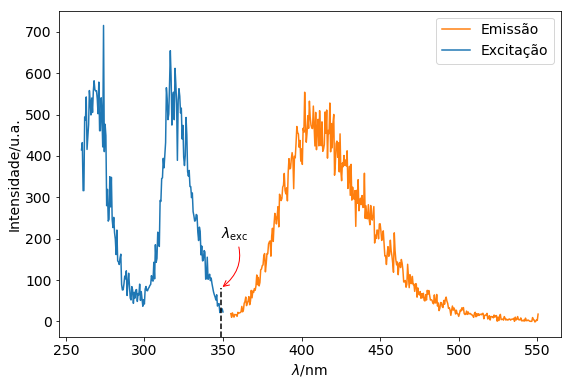

In [7]:
files = glob.glob('*sp')

emissao = pd.read_csv('salicilatoem.sp', sep='\t', header=42, names=['lambda', 'Int'])
excitacao = pd.read_csv('salicilatoexc.sp', sep='\t', header=42, names=['lambda', 'Int'])

fig, ax = plt.subplots(figsize=(9,6))
ax.plot('lambda', 'Int', data=emissao, label='Emissão', c='C1')
ax.plot('lambda', 'Int', data=excitacao, label='Excitação', c='C0')
ax.legend()
ax.axvline(x=348.71, ymax=0.15, color='k', linestyle='--')
an2 = ax.annotate(s=r'$\lambda_{\mathrm{exc}}$', xy=(348.71, 80), xytext=(348.71, 200), 
        arrowprops={'arrowstyle':'->', 'connectionstyle':'arc3, rad=-.4' , 'color':'r'}
        #          arrowprops={'width':2, 'headwidth':10, 'headlength':8, 'connectionstyle':'arc3, rad=-.4', 'color':'r'}
                 )
ax.set(xlabel=r'$\lambda$/nm', ylabel='Intensidade/u.a.')
fig.savefig('../../../fluor/emissao_excitacao.pdf')

# Plotando brutos

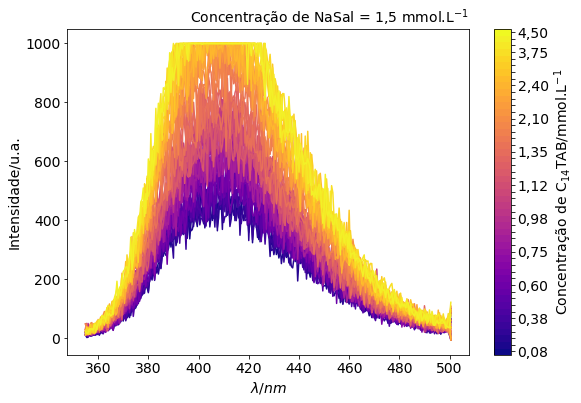

In [8]:
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})
brutos = pd.read_csv('./dados_brutos.txt', sep='\t')
brutos

cores = plt.cm.plasma(np.arange(0, len(brutos.columns)) / len(brutos.columns))

fig, ax = plt.subplots(figsize=(9,6))
for i, col in enumerate(brutos.columns):
    if i == 0:
        continue
    ax.plot(brutos['lambda'], brutos[col], color=cores[i], 
            label=f'{get_prop(col) * 1.5:.2f}'.replace('.', ','))
    
ax.set(xlabel=r'$\lambda/nm$', ylabel='Intensidade/u.a.')

cbar = add_colorbar(fig, ax)
ax.set_title('Concentração de NaSal = 1,5 mmol.L$^{-1}$', loc='right', fontsize='medium')

fig.savefig('../../../fluor/emissao_nasal_bruto.pdf')

# Plotando alisados

In [9]:
names = []
for i, bruto in enumerate(brutos.columns):
    names.append(f'lambda.{i}')
    names.append(bruto)
    
alisados = pd.read_csv('dados_alisados.txt', sep='\t', header=1).dropna(axis=1)
alisados.columns = names[2:]

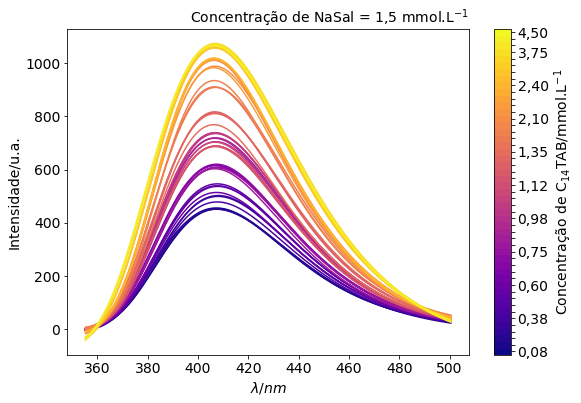

In [10]:
cores = plt.cm.plasma(np.arange(0, len(alisados.columns) / 2) / (len(alisados.columns) / 2))
cores = cores.tolist()
cores.reverse()

fig, ax = plt.subplots(figsize=(9,6))

for comp_onda, fit in zip(alisados.columns[0::2], alisados.columns[1::2]):
    ax.plot(alisados[comp_onda], alisados[fit], color=cores.pop(), 
            label=f'{get_prop(fit) * 1.5:.2f}'.replace('.', ','))
    
ax.set(xlabel=r'$\lambda/nm$', ylabel='Intensidade/u.a.')

cbar = add_colorbar(fig, ax)
ax.set_title('Concentração de NaSal = 1,5 mmol.L$^{-1}$', loc='right', fontsize='medium')

fig.savefig('../../../fluor/emissao_nasal.pdf')

# Plotando junto com ITC

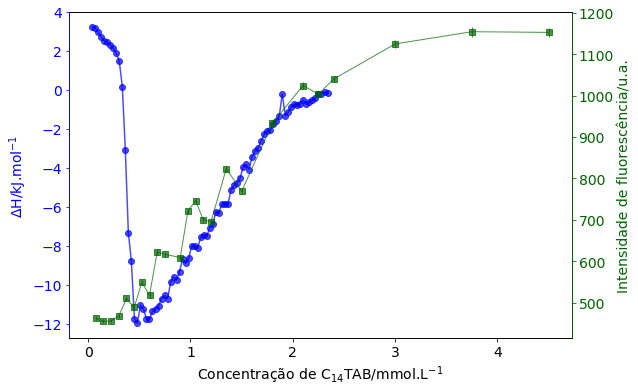

In [11]:
itc = pd.read_csv('itc_comparativo.txt', sep='\t')
alturas = pd.read_csv('alturas_picos.txt', sep='\t')

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(itc['C'] * 1.5, itc['DH'], marker='o', label='ITC', c='blue', alpha=0.7)
ax2 = ax.twinx()
ax2.errorbar(alturas['Prop'] * 1.5, alturas['Altura'], yerr=alturas['Erro'], 
            linewidth=1, marker='s', label='Fluorescência', c='#006600', alpha=0.7)

ax.set(xlabel=r'Concentração de C$_{14}$TAB/mmol.L$^{-1}$', ylabel=r'$\Delta$H/kJ.mol$^{-1}$')
ax2.set(ylabel='Intensidade de fluorescência/u.a.')
ax2.spines['left'].set_color('blue')
ax2.spines['right'].set_color('#006600')
ax.yaxis.label.set_color('blue')
ax2.yaxis.label.set_color('#006600')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='#006600')

fig.savefig('../../../fluor/itc_fluorescencia.pdf')

# Plotando com as setas, indicando o sentido

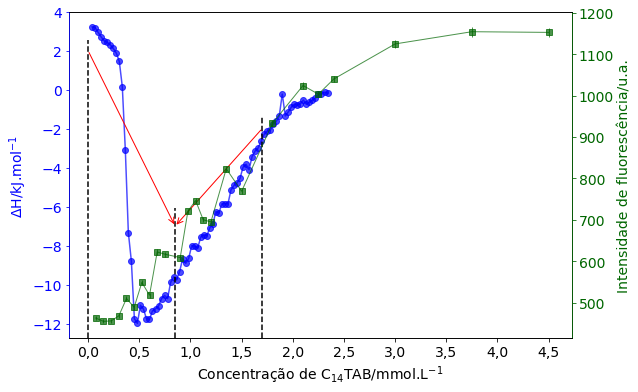

In [13]:
itc = pd.read_csv('itc_comparativo.txt', sep='\t')
alturas = pd.read_csv('alturas_picos.txt', sep='\t')

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(itc['C'] * 1.5, itc['DH'], marker='o', label='ITC', c='blue', alpha=0.7)
ax2 = ax.twinx()
ax2.errorbar(alturas['Prop'] * 1.5, alturas['Altura'], yerr=alturas['Erro'], 
            linewidth=1, marker='s', label='Fluorescência', c='#006600', alpha=0.7)

ax.set(xlabel=r'Concentração de C$_{14}$TAB/mmol.L$^{-1}$', ylabel=r'$\Delta$H/kJ.mol$^{-1}$')
ax2.set(ylabel='Intensidade de fluorescência/u.a.')
ax2.spines['left'].set_color('blue')
ax2.spines['right'].set_color('#006600')
ax.yaxis.label.set_color('blue')
ax2.yaxis.label.set_color('#006600')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='#006600')

xycomeco = (0, 2)
xyfinal = (1.7, -2)
xymeio = (0.85, -7)

# ax.arrow(*xycomeco, +0.72, -9, width=0.03, facecolor='#ff4d4d', edgecolor='k', 
#          head_width=0.1, head_length=0.2)
# ax.arrow(*xyfinal, -0.85, -5, width=0.05, facecolor='#ff4d4d', edgecolor='k',
#         head_width=0.1, head_length=0.2)

an = ax.annotate(s=r'', xy=(xymeio), xytext=(xyfinal), 
       arrowprops={'arrowstyle':'->', 'color':'r'})  #'connectionstyle':'arc3, rad=-.4'
an2 = ax.annotate(s=r'', xy=(xymeio), xytext=(xycomeco), 
       arrowprops={'arrowstyle':'->', 'color':'r'})

centro_vline1 = 0.865
centro_vline2 = 0.63
centro_vline3 = 0.35
delta = 0.05
ax.axvline(x=0, ymin=0, ymax=centro_vline1 + delta, color='k', linestyle='--')
ax.axvline(x=1.7, ymin=0, ymax=centro_vline2 + delta, color='k', linestyle='--')
ax.axvline(x=0.85, ymin=0, ymax=centro_vline3 + delta, color='k', linestyle='--')

ax.set_xticks(np.arange(0, 5, 0.5))
# ax.axvline(x=0, ymin=centro_vline1 - delta, ymax=centro_vline1 + delta, color='red')
# ax.axvline(x=1.7, ymin=centro_vline2 - delta, ymax=centro_vline2 + delta, color='red')
# ax.axvline(x=0.85, ymin=centro_vline3 - delta, ymax=centro_vline3 + delta, color='red')

#ax.arrow(0.7, -12, +0.5, 3, width=0.05, facecolor='r', edgecolor='k')


fig.savefig('../../../fluor/itc_experimento_cinetica.pdf')